In [1]:
# sklearn import
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# plotting libs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns

# pandas and numpy import
import pandas as pd
import numpy as np

# yellowbrick libs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

sns.set_theme()

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

C:\Users\Sub\AppData\Local\Temp\ipykernel_17564\3642063363.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


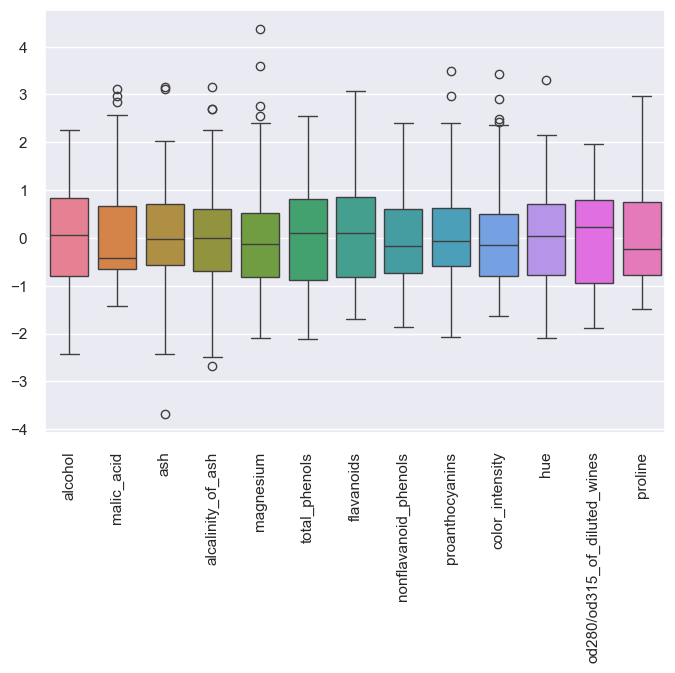

In [3]:
# load wine data
wine_data = load_wine()

wine_df_neumaric = pd.DataFrame(data=wine_data.data,
                                columns=wine_data.feature_names)

wine_df = wine_df_neumaric.copy()
wine_df['label'] = wine_data.target

# Normalize the data
stdscaler = StandardScaler()
wine_df_neumaric_normalized = stdscaler.fit_transform(wine_df_neumaric)

wine_df_neumaric = pd.DataFrame(data=wine_df_neumaric_normalized,
                                columns=wine_data.feature_names)

# box plot
g = sns.boxplot(data=wine_df_neumaric)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Run K-means with yellowbricks

c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

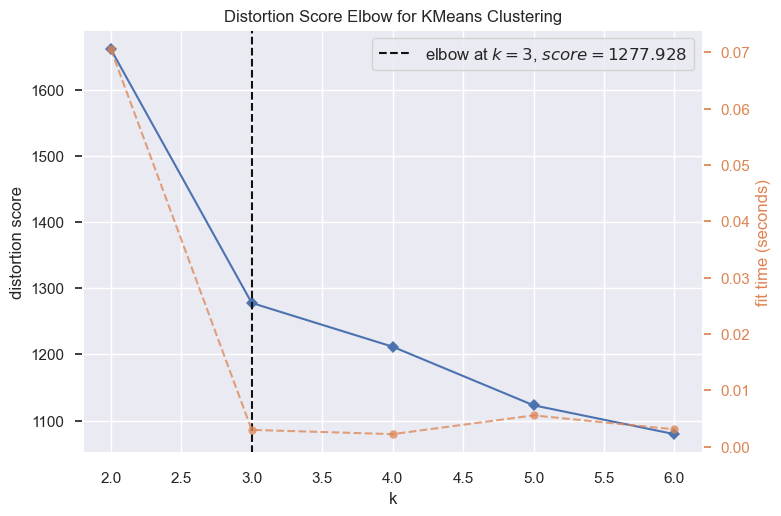

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
# Kmeans
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model, k=(2,3,4,5,6))

visualizer.fit(wine_df_neumaric)

visualizer.show()

c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

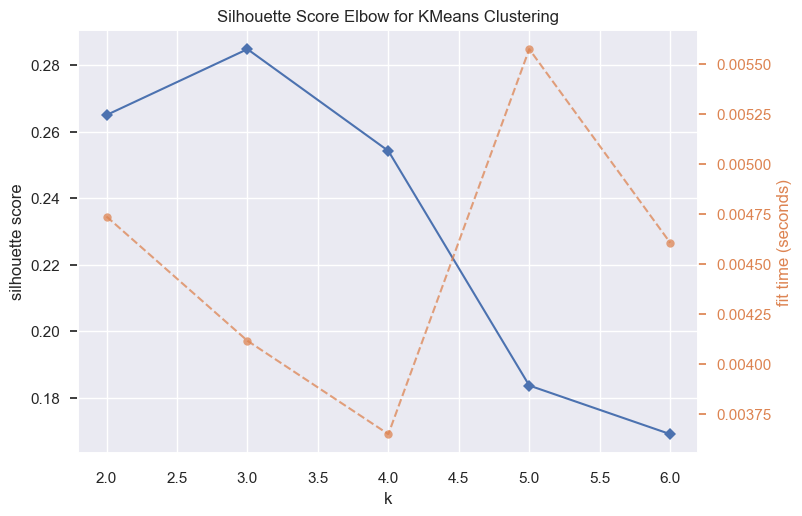

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [6]:
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model, metric='silhouette', k=(2,3,4,5,6), locate_elbow=False)

visualizer.fit(wine_df_neumaric)

visualizer.show()

Total Number of PCA component : 13


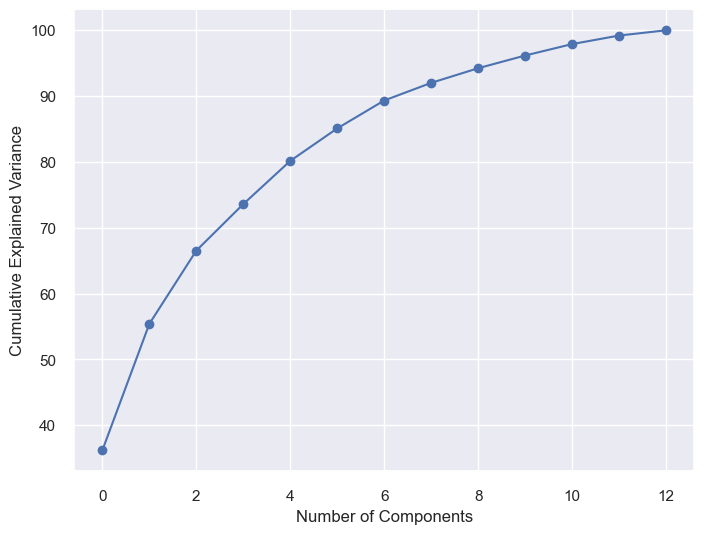

In [21]:
# calculate PCA
pca = PCA()
pca_transfrome_data = pca.fit_transform(wine_df_neumaric)

print("Total Number of PCA component : {}".format(pca_transfrome_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

fig = plt.figure(figsize=(8,6))
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.scatter(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [22]:
candidate_k = [2, 3, 4, 5]

In [23]:
tab10 = list(matplotlib.colormaps['tab10'].colors)

c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Use

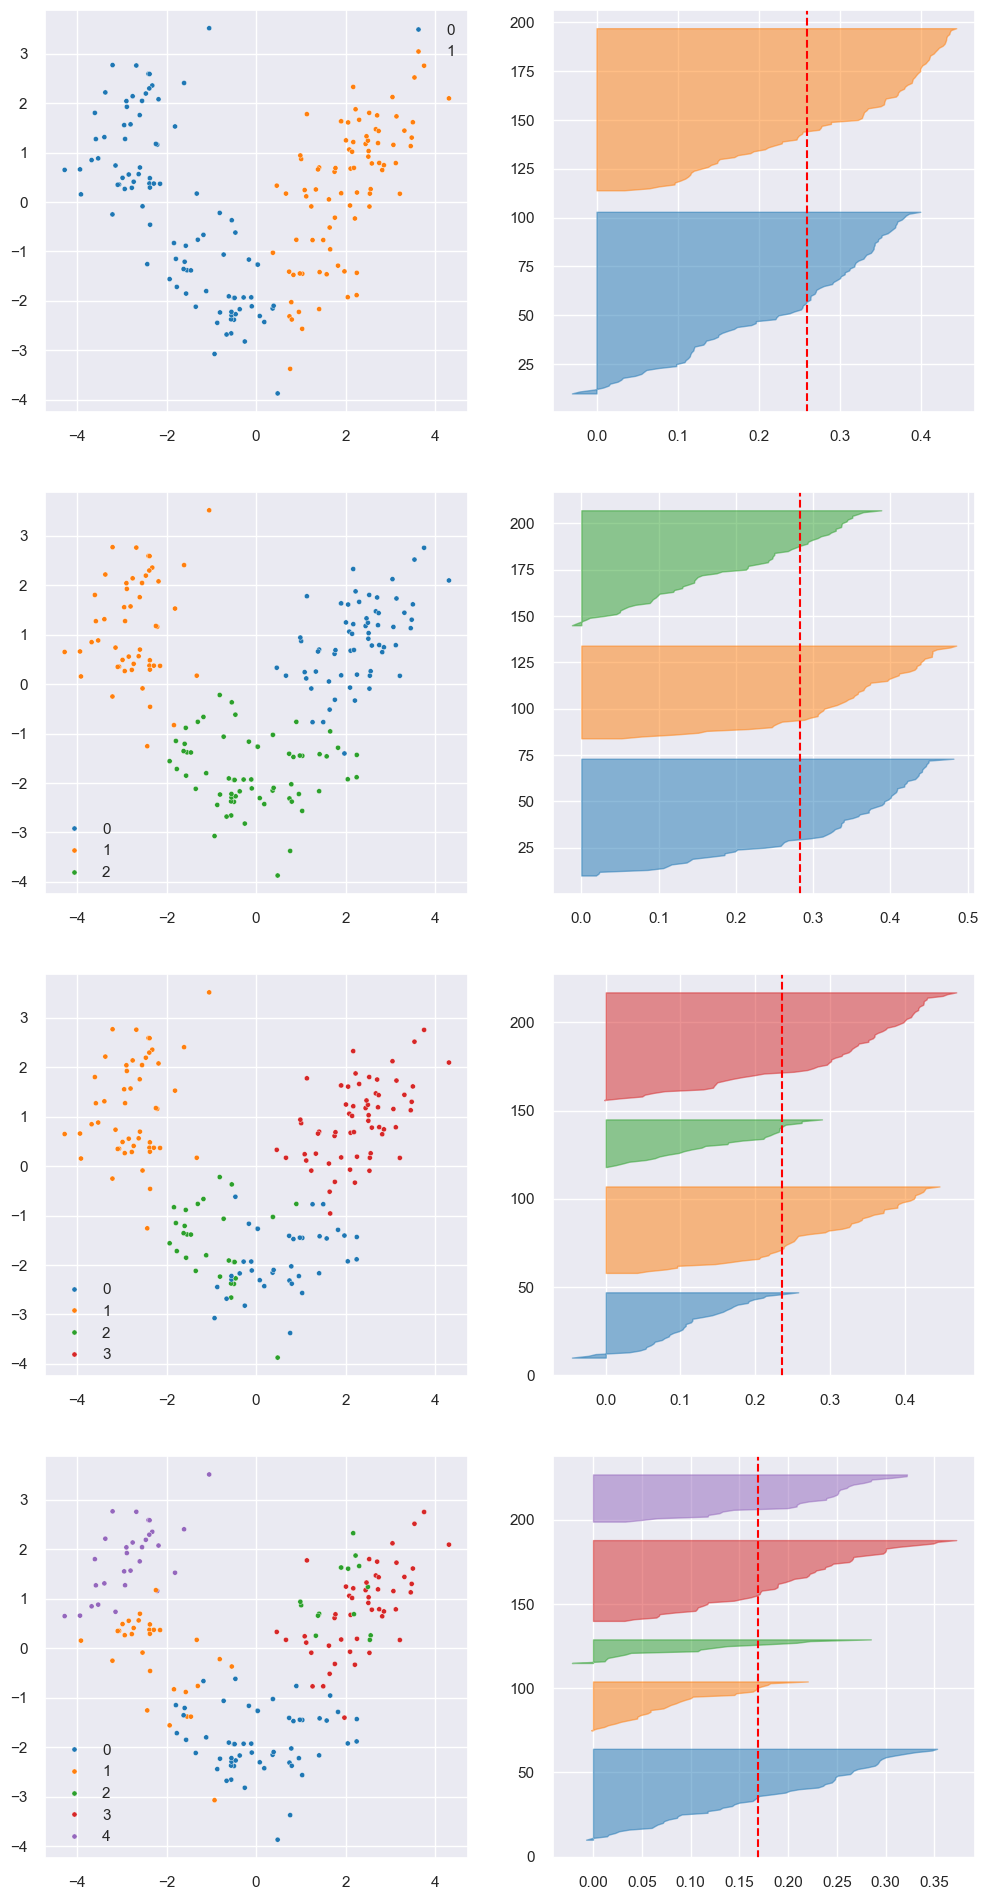

In [36]:
# perform clustering for multiple resolutions
fig, axes = plt.subplots(
    len(candidate_k), 2,
    figsize=(12,24)
)

cluster_label_dict = {}

for i, num_cluster in enumerate(candidate_k):

    # calculate the kmeans
    kmeans = KMeans(n_clusters=num_cluster, n_init='auto')
    kmeans.fit(wine_df_neumaric)

    sns.scatterplot(x=pca_transfrome_data[:, 0],
                y=pca_transfrome_data[:, 1],
                hue=kmeans.labels_,
                palette='tab10',
                ax=axes[i,0],
                s=14)
    
    visualizer = SilhouetteVisualizer(kmeans,
                                    is_fitted=True,
                                    colors=tab10,
                                    ax = axes[i, 1])
    
    visualizer = visualizer.fit(wine_df_neumaric)

    cluster_label_dict[num_cluster] = kmeans.labels_